**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv("C:/Users/kavya/desktop/credit_card_dataset/cleaned_data.csv")

In [4]:
# Define the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

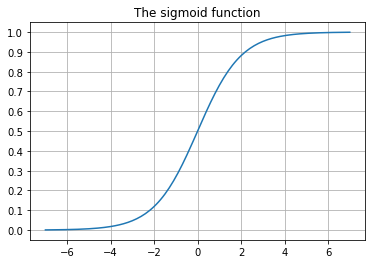

In [5]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')


**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [6]:
# Create a train/test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['PAY_1'].values.reshape(-1,1),df['default payment next month'].values,test_size=0.2, random_state=24)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [7]:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)


______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [8]:
# Fit the logistic regression model on training data

cc_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [18]:
# Make predictions using `.predict()`
y_pred = cc_lr.predict(X_test)

In [19]:
# Find class probabilities using `.predict_proba()`
y_pred_proba = cc_lr.predict_proba(X_test)
y_pred_proba

array([[0.47444743, 0.52555257],
       [0.6559123 , 0.3440877 ],
       [0.8947297 , 0.1052703 ],
       ...,
       [0.8947297 , 0.1052703 ],
       [0.6559123 , 0.3440877 ],
       [0.47444743, 0.52555257]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [20]:
# Add column of 1s to features
column_1=np.hstack([np.ones((X_test.shape[0],1)),X_test])
column_1

array([[ 1.,  2.],
       [ 1.,  1.],
       [ 1., -1.],
       ...,
       [ 1., -1.],
       [ 1.,  1.],
       [ 1.,  2.]])

In [21]:
# Get coefficients and intercepts from trained model
print('Coefficients Of Trained Logistic Model',cc_lr.coef_)
print('Intercepts of Trained Logistic Model',cc_lr.intercept_)
model_coefficient=cc_lr.coef_
model_intercept=cc_lr.intercept_

Coefficients Of Trained Logistic Model [[0.74742992]]
Intercepts of Trained Logistic Model [-1.39256045]


In [22]:
coefficient_intercept_features=np.concatenate([model_intercept.reshape(1,1),model_coefficient],axis=1)
coefficient_intercept_features

array([[-1.39256045,  0.74742992]])

In [23]:
# Manually calculate predicted probabilities
manual_probability=np.dot(coefficient_intercept_features,np.transpose(column_1))
manual_probability

array([[ 0.10229939, -0.64513053, -2.13999037, ..., -2.13999037,
        -0.64513053,  0.10229939]])

In [24]:
sigmoid_probability=sigmoid(manual_probability)
sigmoid_probability

array([[0.52555257, 0.3440877 , 0.1052703 , ..., 0.1052703 , 0.3440877 ,
        0.52555257]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [25]:
# Manually calculate predicted classes
pred_class=sigmoid_probability>=0.5

In [26]:
# Compare to scikit-learn's predicted classes
print(pred_class.shape)
print(y_pred.shape)
np.array_equal(pred_class,y_pred.reshape(1,-1))

(1, 5333)
(5333,)


True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [27]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_proba[:,1])

0.675865230987299

In [28]:
# Use manually calculated predicted probabilities to calculate ROC AUC
metrics.roc_auc_score(y_test,manual_probability.reshape(manual_probability.shape[1],))

0.675865230987299